In [1]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [2]:
# importar las librerias:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
import random
import seaborn as sns
import imblearn
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRegressor
import xgboost
warnings.filterwarnings('ignore')


In [3]:
# carga de los dataset:
train_df=pd.read_csv('mitbih_train.csv',header=None)
test_df=pd.read_csv('mitbih_test.csv',header=None)

In [4]:
# Dataset desbalanceados: 
X_train=train_df.iloc[:,:-1]
y_train=train_df.iloc[:,-1]

In [5]:
X_test=test_df.iloc[:,:-1]
y_test=test_df.iloc[:,-1]

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(87554, 187)
(87554,)
(21892, 187)
(21892,)


In [7]:
y_train = y_train.astype(int)
equilibre = y_train.value_counts()
print(equilibre)

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


In [8]:
from imblearn.under_sampling import RandomUnderSampler

In [9]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

In [10]:
# dataset equilibrado
y_res = y_res.astype(int)
equilibre = y_res.value_counts()
print(equilibre)


3    641
1    641
4    641
2    641
0    641
Name: 187, dtype: int64


#A partir de aca se corre el modelo con X_res, y_res en vez de con X_train, y_train

***Gradient Boosting***

In [11]:
# Fit a Gradient Boosting model
clf = GradientBoostingClassifier(
    n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(X_res, y_res)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))


0.6900237529691211

              precision    recall  f1-score   support

         0.0       0.98      0.66      0.79     18118
         1.0       0.13      0.71      0.22       556
         2.0       0.43      0.77      0.55      1448
         3.0       0.08      0.92      0.14       162
         4.0       0.74      0.94      0.83      1608

    accuracy                           0.69     21892
   macro avg       0.47      0.80      0.50     21892
weighted avg       0.90      0.69      0.76     21892



In [12]:
import pickle
# Save the model as a pickle
import pickle
filename = './modelos/gb_undersampling.pkl'
pickle.dump(clf, open(filename, 'wb'))


In [13]:
# matriz de confución normalizada:
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [14]:
y_pred_df = pd.DataFrame(y_pred)
y_test_df = pd.DataFrame(y_test)


Normalized confusion matrix


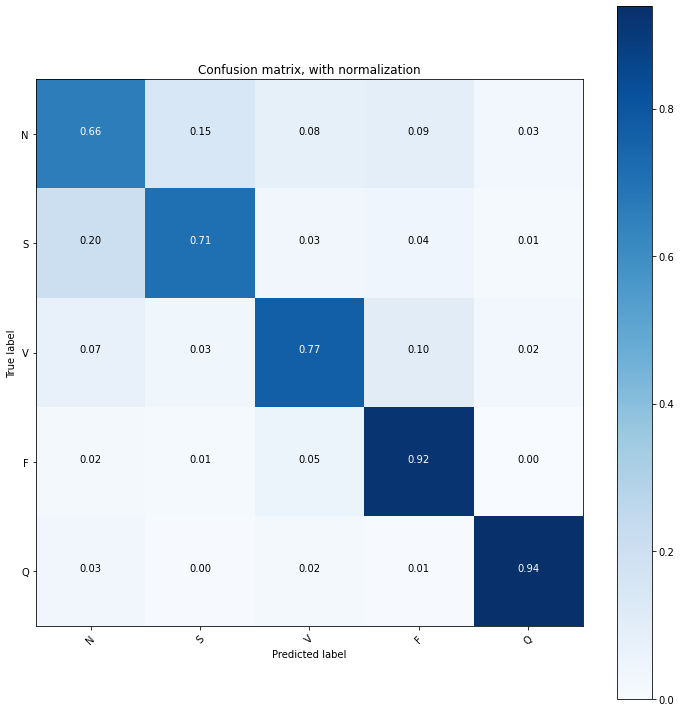

In [15]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_df, y_pred_df)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'], normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()
